# Описание проекта:

Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

* лог сервера с данными об их посещениях,
* выгрузка их покупок за этот период,
* рекламные расходы.


Вам предстоит изучить:

* откуда приходят пользователи и какими устройствами они пользуются,
* сколько стоит привлечение пользователей из различных рекламных каналов;
* сколько денег приносит каждый клиент,
* когда расходы на привлечение клиента окупаются,
* какие факторы мешают привлечению клиентов.


# План работы:

* Загрузим данные и подготовим их к анализу
 
* Создадим функции для расчета и анализа LTV, ROI, удержания и конверсии

* Проведм исследовательский анализ данных

* Постройте профили пользователей. Определите минимальную и максимальную дату привлечения пользователей.

* Выясним:
    - Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
    - Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
    - По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?.

* Маркетинг. Выясним:

    - Сколько денег потратили? Всего / на каждый источник / по времени
    - Сколько в среднем стоило привлечение одного покупателя из каждого источника?

* Оценим окупаемость рекламы для привлечения пользователей

* С помощью LTV и ROI:
    - Проанализируем общую окупаемость рекламы;
    - Проанализируем окупаемость рекламы с разбивкой по устройствам;
    - Проанализируем окупаемость рекламы с разбивкой по странам;
    - Проанализируем окупаемость рекламы с разбивкой по рекламным каналам.

* Ответим на вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом? 
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости? Изучим конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишем возможные причины обнаруженных проблем.Считаем, что мы смотрим данные 1-го ноября 2019 года и что в нашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.


*  Напишем выводы
    - Выделите причины неэффективности привлечения пользователей;
    - Сформируйте рекомендации для отдела маркетинга для повышения эффективности.





# Описание данных
Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Таблица orders_log_short (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

Таблица costs_short (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

## Загрузка данных и подготовка их к анализу

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
sessions = pd.read_csv('visits_info_short.csv')
orders = pd.read_csv('orders_info_short.csv')
costs =  pd.read_csv('costs_info_short.csv')

In [3]:
print(sessions.info())
print()
print(orders.info())
print()
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #

Преобразуем типы для дат, видим что нигде нет пропусков. Также названия столбцов приведем к нижнему регистру:

In [4]:
sessions['Session Start'] = pd.to_datetime(sessions['Session Start'])
sessions['Session End'] = pd.to_datetime(sessions['Session End'])
orders['Event Dt'] = pd.to_datetime(orders['Event Dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [5]:
sessions.columns = [x.lower().replace(' ', '_') for x in sessions.columns.values]
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns.values]
costs.columns = [x.lower().replace(' ', '_') for x in costs.columns.values]

In [6]:
# проверка на дубликаты
print(sessions.duplicated().sum())
print(orders.duplicated().sum())
print(costs.duplicated().sum())

0
0
0


In [7]:
display(sessions.head(), orders.head(), costs.head())

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Нет явных дубликатов и пропусков, данные подготовлены для анализа

## Создадим функции для расчета и анализа LTV, ROI, удержания и конверсии


Определим функцию для получения профилей пользователей:

    - def get_prof(sessions, orders, costs)
    
Описание работы:

Для кажого пользователя мы определяем является ли он покупателем, дату первого посещения("dt"), а также Customer Acquisition Cost - стоимость привлечения одного клиента. Также у нас будет информация о последнем посещении и канале привлечения

In [8]:
def get_prof(sessions, orders, costs):
    
    prof = sessions.sort_values(by = ['user_id', 'session_start'])\
    .groupby('user_id').agg({
        'region' : 'first',
        'device' : 'first', 
        'channel' : 'first',
        'session_start' : 'first', 
        'session_end' : 'last'
    }).rename(columns = {'session_start': 'first_ts',
                      'session_end' : 'last_ts'}).reset_index()
    
    prof['dt'] = prof['first_ts'].dt.date
    prof['month'] = prof['dt'].astype('datetime64[M]')
    
    prof['payer'] = prof['user_id'].isin(orders['user_id'].unique())
    
    new_users = prof.groupby(['dt', 'channel']).agg({'user_id' : \
       'nunique'}).rename(columns = {'user_id' : 'nunique_users'}).reset_index()
    
    costs = costs.merge(new_users, on = ['dt', 'channel'], how = 'left')
    costs['CAC'] = costs['costs'] / costs['nunique_users']
    
    prof = prof.merge(costs[['dt', 'channel','CAC']],\
                      on = ['dt', 'channel'], how = 'left')
    prof = prof.fillna(0)
    return prof
    

Создадим функцию для расчёта Retention - показатель удержания пользователей


У нас есть параметры :

* observation_date - дата наблюдения
* ignore_horison - игнорировать ли горизонт анализа
* dimensions - сюда можно передать названия столбцов, срезы по которым мы хотим посмотреть

In [9]:
# функция для расчёта Retention
def get_retention(
    prof,
    sessions,
    observation_date, # дата наблюдения
    horison,
    dimensions = [],
    ignore_horison = False):
     
    dimensions = ['payer'] + dimensions
    
    last_suitable_observation_date = observation_date
    if not ignore_horison:
        last_suitable_observation_date = observation_date - timedelta(horison - 1)
    
    result_raw = prof.query('dt <= @last_suitable_observation_date')
    
    result_raw = result_raw.merge(sessions[['user_id', 'session_start']], \
                                  on = ['user_id'], how = 'left')
    
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']).dt.days
    
    def group_by_dimensions(df, dimensions, horizon_days):
        result = df.pivot_table(
            index=dimensions, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dimensions)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dimensions, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result
    
    
    
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
    
    return result_raw, result_grouped, result_in_time 

Функция для расчёта коверсии

In [10]:
def get_conversion(
    prof,
    purchases, 
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    # дропнем пользователей выходящих за горизонт
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    
    result_raw = prof.query('dt <= @last_suitable_acquisition_date')
    
    
    first_purchases = (
        purchases.sort_values(by = ['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )
    
    result_raw = result_raw.merge(first_purchases[['user_id', 'event_dt']],\
                                  on = 'user_id' , how = 'left')
    
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']
    
    
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result
    
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []
    
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 
    

Функция для расчёта LTV

In [11]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on = 'user_id', how = 'left'
    )
    
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']
    
    def group_by_dimensions(df, dimensions, horison_days):
        
        result = df.pivot_table(
            index = dimensions, columns = 'lifetime', values = 'revenue',\
            aggfunc = 'sum'
        )
        result = result.fillna(0).cumsum(axis =1)
        
        cohort_sizes = (
            df.groupby(dimensions)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dimensions, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis = 0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        
        cac = df[['user_id', 'CAC'] + dimensions].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dimensions)
            .agg({'CAC': 'mean'})
            .rename(columns={'CAC': 'cac'})
        )
        
        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes
        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi
    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

## Исследовательский анализ данных

Построим профили пользователей. Определим минимальную и максимальную дату привлечения пользователей.

Выясним:
- Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?
- Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?
- По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

In [12]:
# получим профили пользователей
prof = get_prof(sessions, orders, costs)
# dt = first session date
# посмотрим на данные для какого то конкретного пользователя
prof.query('user_id == 981449118918')

,user_id,region,device,channel,first_ts,last_ts,dt,month,payer,CAC
147198,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-12 09:17:49,2019-05-01,2019-05-01,False,0.0


In [13]:
# всё верно : в профиле пользоателя созранились данные о дате первой сессии
display(sessions.query('user_id == 981449118918'))

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1293,981449118918,United States,iPhone,organic,2019-05-03 10:24:18,2019-05-03 10:34:53
9818,981449118918,United States,iPhone,YRabbit,2019-05-12 08:55:23,2019-05-12 09:17:49


**Определим минимальную и максимальную дату привлечения пользователей.**

In [14]:
min_date = prof['dt'].min()
max_date = prof['dt'].max()
print(min_date, max_date)

2019-05-01 2019-10-27


1 мая и 27 октября - соответствуют описанию данных

### Из каких стран приходят посетители? Какие страны дают больше всего платящих пользователей?

In [15]:
# сгруппируем профили платящих пользователей по региону и посчитаем число уникальных пользователей
prof_reg = prof.query('payer == True').groupby('region').agg({'user_id' :\
                'nunique'}).reset_index().rename(columns = {'user_id' : 'payers'})
# сгруппируем профили всех пользователей по региону и посчитаем число уникальных пользователей
prof_reg_ = prof.groupby('region').agg({'user_id' : 'nunique'}).reset_index().rename(columns = {'user_id' : 'total_users'})
# соеденим таблицы
prof_reg = prof_reg.merge(prof_reg_, on = 'region', how = 'outer')
prof_reg['payer_per_total'] = prof_reg['payers'] / prof_reg['total_users']
prof_reg.sort_values(by = 'payer_per_total', ascending= False)

,region,payers,total_users,payer_per_total
3,United States,6902,100002,0.069019
1,Germany,616,14981,0.041119
2,UK,700,17575,0.039829
0,France,663,17450,0.037994


Видим что наши пользователи приходят со штатов, Германии, Великобритании, Франции. Большая доля платящих идёт со штатов - получается они наша более лояльая аудитория


Отобразим это нна графике

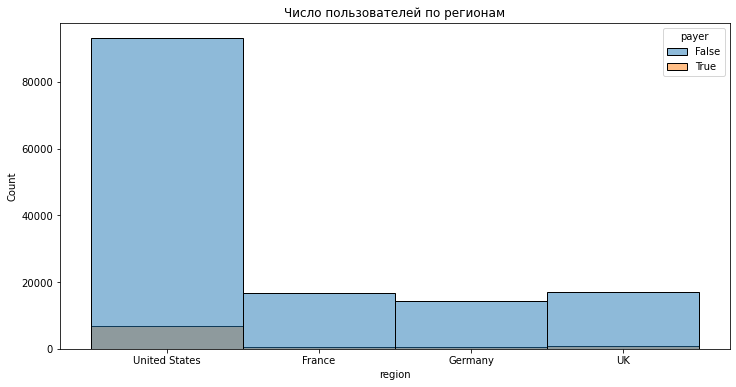

In [16]:
plt.figure(figsize = (12,6))
sns.histplot(
    prof, x = 'region', hue = 'payer'
)
plt.title('Число пользователей по регионам')
print()

Видим что больше всего платящих пользователей от United States (также имеют наибольшую долю платящих)

### Какими устройствами они пользуются? С каких устройств чаще всего заходят платящие пользователи?

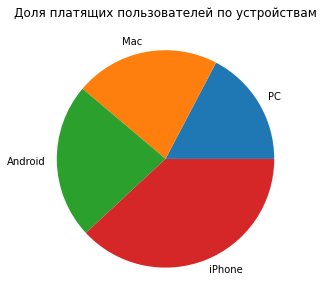

In [17]:
prof_device = prof.query('payer == True').groupby('device').agg({'user_id' : 'nunique'}).reset_index().sort_values(by = 'user_id')
plt.figure(figsize = (5,5))
plt.pie(prof_device['user_id'], labels = prof_device.device)
plt.title('Доля платящих пользователей по устройствам')
print()
print()

,device,payers,total_users,payer_per_total
2,PC,1537,30455,0.050468
0,Android,2050,35032,0.058518
3,iPhone,3382,54479,0.062079
1,Mac,1912,30042,0.063644


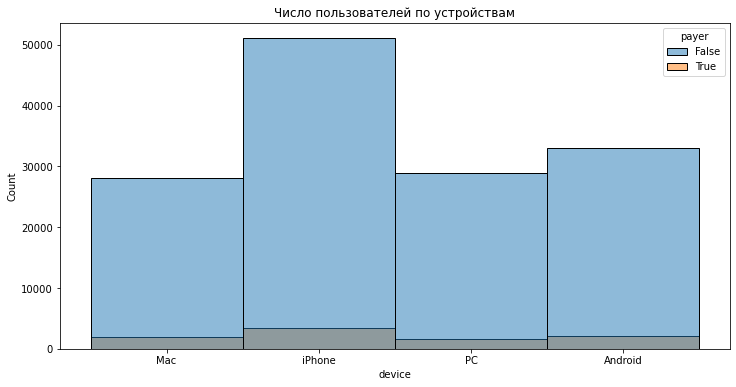

In [18]:
# найдем колчиество всех пользователей с разбивкой по девайсам
prof_device = prof.groupby('device').agg({'user_id' :\
                                        'nunique'}).reset_index().rename(columns = {'user_id' : 'total_users'})
# найдем колчиество платящих пользователей с разбивкой по девайсам
prof_device_ = prof.query('payer == True').groupby('device').agg({'user_id' \
                                                  : 'nunique'}).reset_index().rename(columns = {'user_id' : 'payers'})

prof_device_ = prof_device_.merge(prof_device, on = 'device', how = 'outer')
prof_device_['payer_per_total'] = prof_device_['payers'] / prof_device_['total_users']
display(prof_device_.sort_values(by = 'payer_per_total'))


plt.figure(figsize = (12,6))
sns.histplot(
    prof, x = 'device', hue = 'payer'
)
plt.title('Число пользователей по устройствам')
print()

Среди платящих выделяются пользователи iPhone  и Android - т.е телефоны, а доля платящих максимальна для iPhone, Mac

### По каким рекламным каналам шло привлечение пользователей? Какие каналы приносят больше всего платящих пользователей?

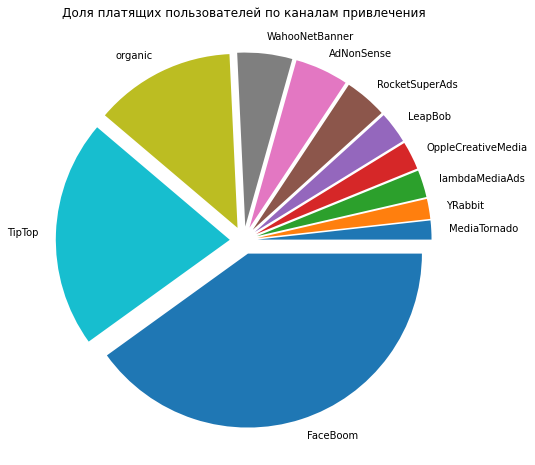

In [19]:
prof_channel = prof.query('payer == True').groupby('channel').agg({'user_id' : 'nunique'}).reset_index().sort_values(by = 'user_id')
plt.figure(figsize = (8,8))
plt.pie(prof_channel['user_id'], labels = prof_channel.channel, explode=[0.08]*11)
plt.title('Доля платящих пользователей по каналам привлечения')
print()
print()

,channel,payers,total_users,payer_per_total
10,organic,1160,56439,0.020553
4,OppleCreativeMedia,233,8605,0.027077
2,LeapBob,262,8553,0.030633
3,MediaTornado,156,4364,0.035747
8,YRabbit,165,4312,0.038265
7,WahooNetBanner,453,8553,0.052964
5,RocketSuperAds,352,4448,0.079137
6,TipTop,1878,19561,0.096007
9,lambdaMediaAds,225,2149,0.104700
0,AdNonSense,440,3880,0.113402


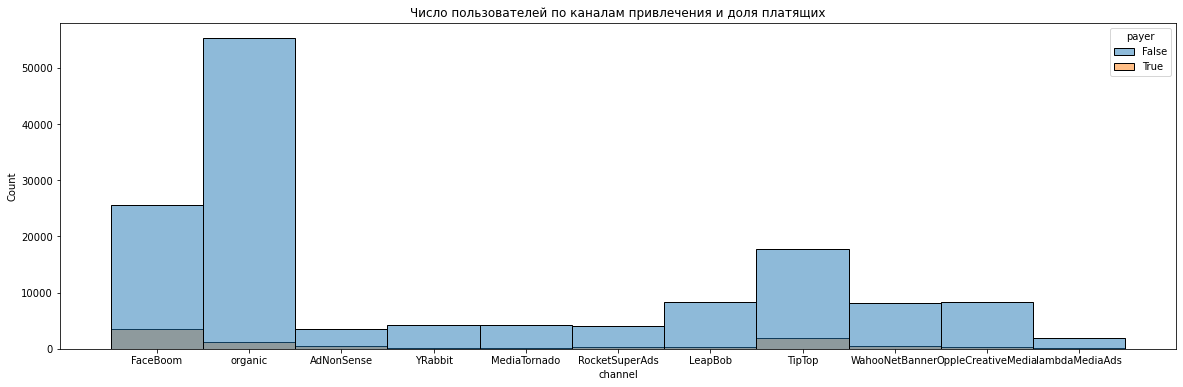

In [20]:
prof_channel = prof.groupby('channel').agg({'user_id' :\
                                        'nunique'}).reset_index().rename(columns = {'user_id' : 'total_users'})
prof_channel_ = prof.query('payer == True').groupby('channel').agg({'user_id' \
                                                  : 'nunique'}).reset_index().rename(columns = {'user_id' : 'payers'})
prof_channel_ = prof_channel_.merge(prof_channel, on = 'channel', how = 'outer')
prof_channel_['payer_per_total'] = prof_channel_['payers'] / prof_channel_['total_users']
display(prof_channel_.sort_values(by = 'payer_per_total'))


plt.figure(figsize = (20,6))
sns.histplot(
    prof, x = 'channel', hue = 'payer'
)
plt.title('Число пользователей по каналам привлечения и доля платящих')
print()

Больше всего платящих пользователей приносят : FaceBoom, TipTop, organic.

Наибольшую долю платящих имеют : FaceBoom, AdNonSense, lambdaMediaAds

## Маркетинг

### Выясним:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

In [21]:
costs.costs.sum()

105497.30000000002

Всего с мая по конец октября потратили : ~105497 едениц валюты

,channel,costs
8,YRabbit,944.22
3,MediaTornado,954.48
9,lambdaMediaAds,1557.60
2,LeapBob,1797.60
5,RocketSuperAds,1833.00
4,OppleCreativeMedia,2151.25
0,AdNonSense,3911.25
7,WahooNetBanner,5151.00
1,FaceBoom,32445.60
6,TipTop,54751.30


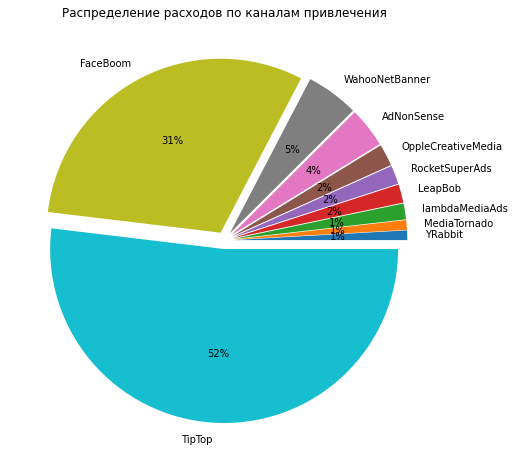

In [22]:
# На каждый источкик потралили: 
costs_channel = costs.groupby('channel').agg({'costs' : 'sum'}).reset_index().sort_values(by = 'costs')
display(costs_channel)

plt.figure(figsize = (8,8))
plt.pie(costs_channel.costs, labels = costs_channel.channel,  explode=[0.05]*10, autopct='%1.0f%%')
plt.title('Распределение расходов по каналам привлечения')
print()

Больше всего вложили в рекламу на платформах : TipTop, FaceBoom - самые популярные каналы


Посмотрим динамику затрат

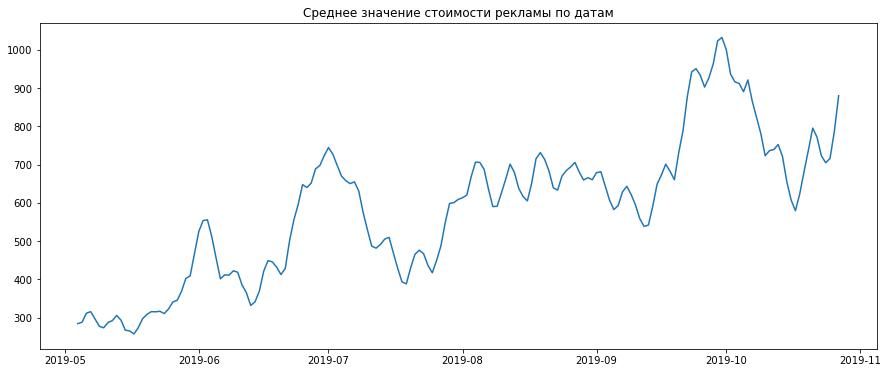

In [23]:
costs_dt = costs.groupby('dt').agg({'costs' : 'sum'})
costs_dt.head(3)

df = costs_dt.copy()
# применим скользящее среднее .rolling чтобы убрать шумы
df.costs = df.costs.rolling(4).mean()
plt.figure(figsize = (15,6))
plt.plot(df)
plt.title('Среднее значение стоимости рекламы по датам')
print()

Больше всего вкладывали в октябре

Посмотрим CAC по каналам привлечения

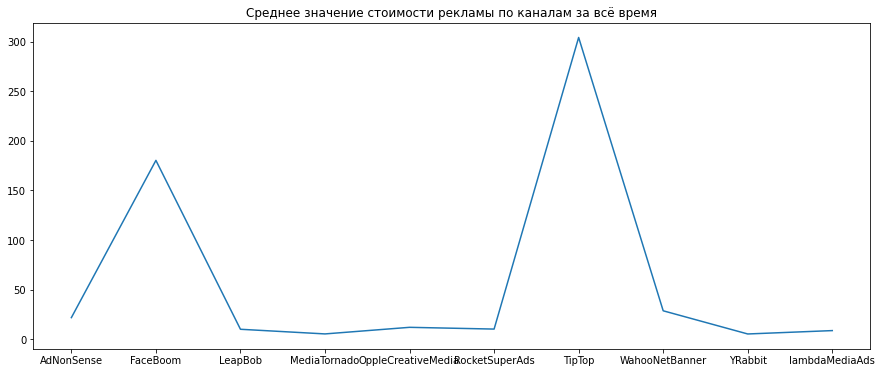

In [24]:
costs_ch = costs.groupby('channel').agg({'costs' : 'mean'})

df = costs_ch.copy()
plt.figure(figsize = (15,6))
plt.plot(df)
plt.title('Среднее значение стоимости рекламы по каналам за всё время')
print()

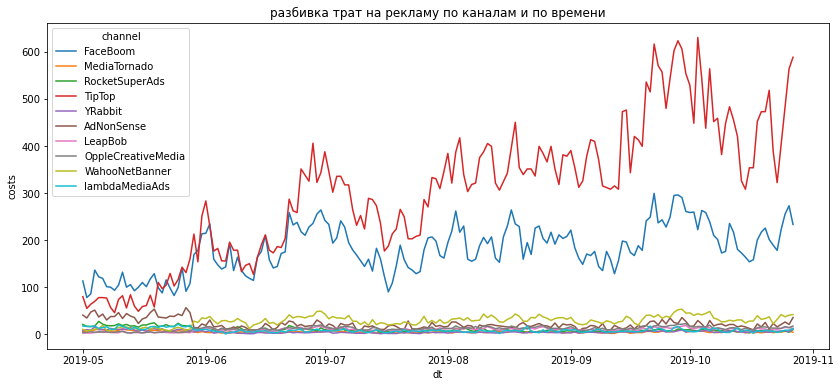

In [25]:
plt.figure(figsize = (14,6))
sns.lineplot(data = costs, x = 'dt', y = 'costs', hue = 'channel')
plt.title('разбивка трат на рекламу по каналам и по времени')
print()

Видим что на  TipTop, FaceBoom стабильно тратим больше

### Сколько в среднем стоило привлечение одного покупателя из каждого источника?

In [26]:
# сохраним датасет с оргаическими пользователями в отдельный датасет
profiles_org = prof.copy()
# убираем органических
prof = prof.query('channel != "organic"')

prof.groupby('channel').agg({'CAC': 'mean'}).reset_index().sort_values(by = 'CAC')

,channel,CAC
2,LeapBob,0.210172
3,MediaTornado,0.218717
8,YRabbit,0.218975
4,OppleCreativeMedia,0.250000
5,RocketSuperAds,0.412095
7,WahooNetBanner,0.602245
9,lambdaMediaAds,0.724802
0,AdNonSense,1.008054
1,FaceBoom,1.113286
6,TipTop,2.799003


Видим что привлекать покупателей из TipTop, FaceBoom и AdNonSense дороже всего.

Рассчитаем *средний CAC на одного пользователя для всего проекта*

In [27]:
prof['CAC'].mean()

1.127481323942928

Средний CAC для всех = 1,12

## Оценим окупаемость рекламы для привлечения пользователей


* С помощью LTV и ROI:
    - Проанализируем общую окупаемость рекламы;
    - Проанализируем окупаемость рекламы с разбивкой по устройствам;
    - Проанализируем окупаемость рекламы с разбивкой по странам;
    - Проанализируем окупаемость рекламы с разбивкой по рекламным каналам.

* Ответим на вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом? 
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости? Изучим конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.


Зададим функции визуализации конверсии, retention и LTV, ROI - RETURN ON INVESTMENT/ и  функцию сглаживания

In [28]:
def filter_data(df, window):
    # window - окно сглаживания, чем оно больше тем график более гладкий
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

In [29]:
def plot_retention(retention, retention_history, horizon, window = 7 ):
    
    plt.figure(figsize = (15,10))
    
    retention = retention.drop(columns = ['cohort_size', 0])
    
    retention_history = retention_history.drop(columns =\
                                               ['cohort_size'])[[horizon -1]]
    
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])
        
    ax1 = plt.subplot(2,2,1)
    retention.query('payer == True').droplevel('payer').T.plot(grid = True,\
                                                               ax = ax1)
    
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')
    
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')
    
    ax3 = plt.subplot(2,2,3)
    
    columns = [
        name for name in retention_history.index.names \
        if name not in ['dt', 'payer']
    ]
    
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [30]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [31]:
def plot_ltv_roi(
    ltv, ltv_history, roi, roi_history, horizon, window = 7
):
    
    plt.figure(figsize=(20,16))
    
    ltv = ltv.drop(columns = ['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    
    cac_history = roi_history[['cac']]
    
    roi = roi.drop(columns = ['cac', 'cohort_size'])
    roi_history = roi_history.drop(columns = \
                                   ['cac', 'cohort_size'])[[horizon - 1]]
    
    ax1 = plt.subplot(3,2, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')
    
    ax2 = plt.subplot(3,2,2, sharey = ax1)
    
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index = 'dt', columns = columns, values = horizon -1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid = True, ax = ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))
    
    ax3 = plt.subplot(3,2, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(3,2, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(3,2, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Проанализируем общую окупаемость рекламы

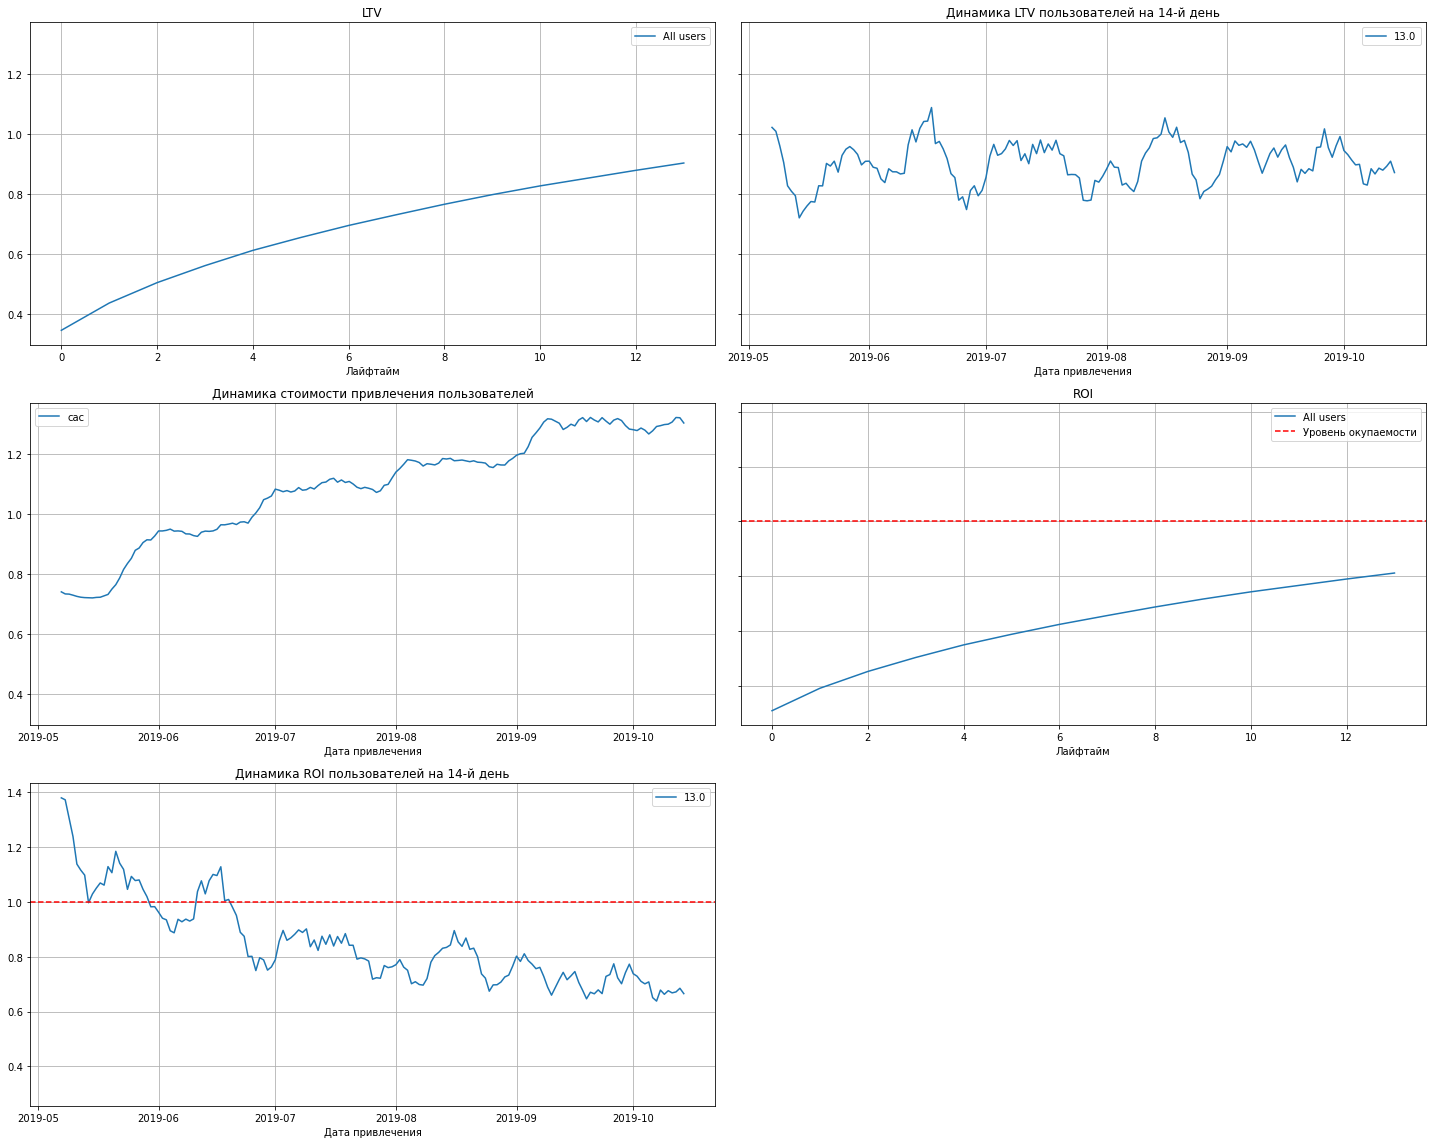

In [32]:
observation_date = max_date
horizon_days = 14
# будем учитывать горизонт анализа, момент анализа = максимальной дате, смотри когорты за 2 недели
result_raw, result_grouped, result_in_time, roi_grouped,\
roi_in_time = get_ltv(profiles = prof,
    purchases = orders,
    observation_date = observation_date,
    horizon_days = horizon_days,
    dimensions=[]
    )

plot_ltv_roi(ltv = result_grouped, ltv_history = result_in_time, \
             roi = roi_grouped, roi_history = roi_in_time,\
             horizon = horizon_days, window=7)

 - Видим что реклама перестала окупаться в середине июня
 - CAC постепенно растёт, LTV примерно на одном уровне
 - ROI не переходит порог к 14 дню
 

### Проанализируем окупаемость рекламы с разбивкой по устройствам

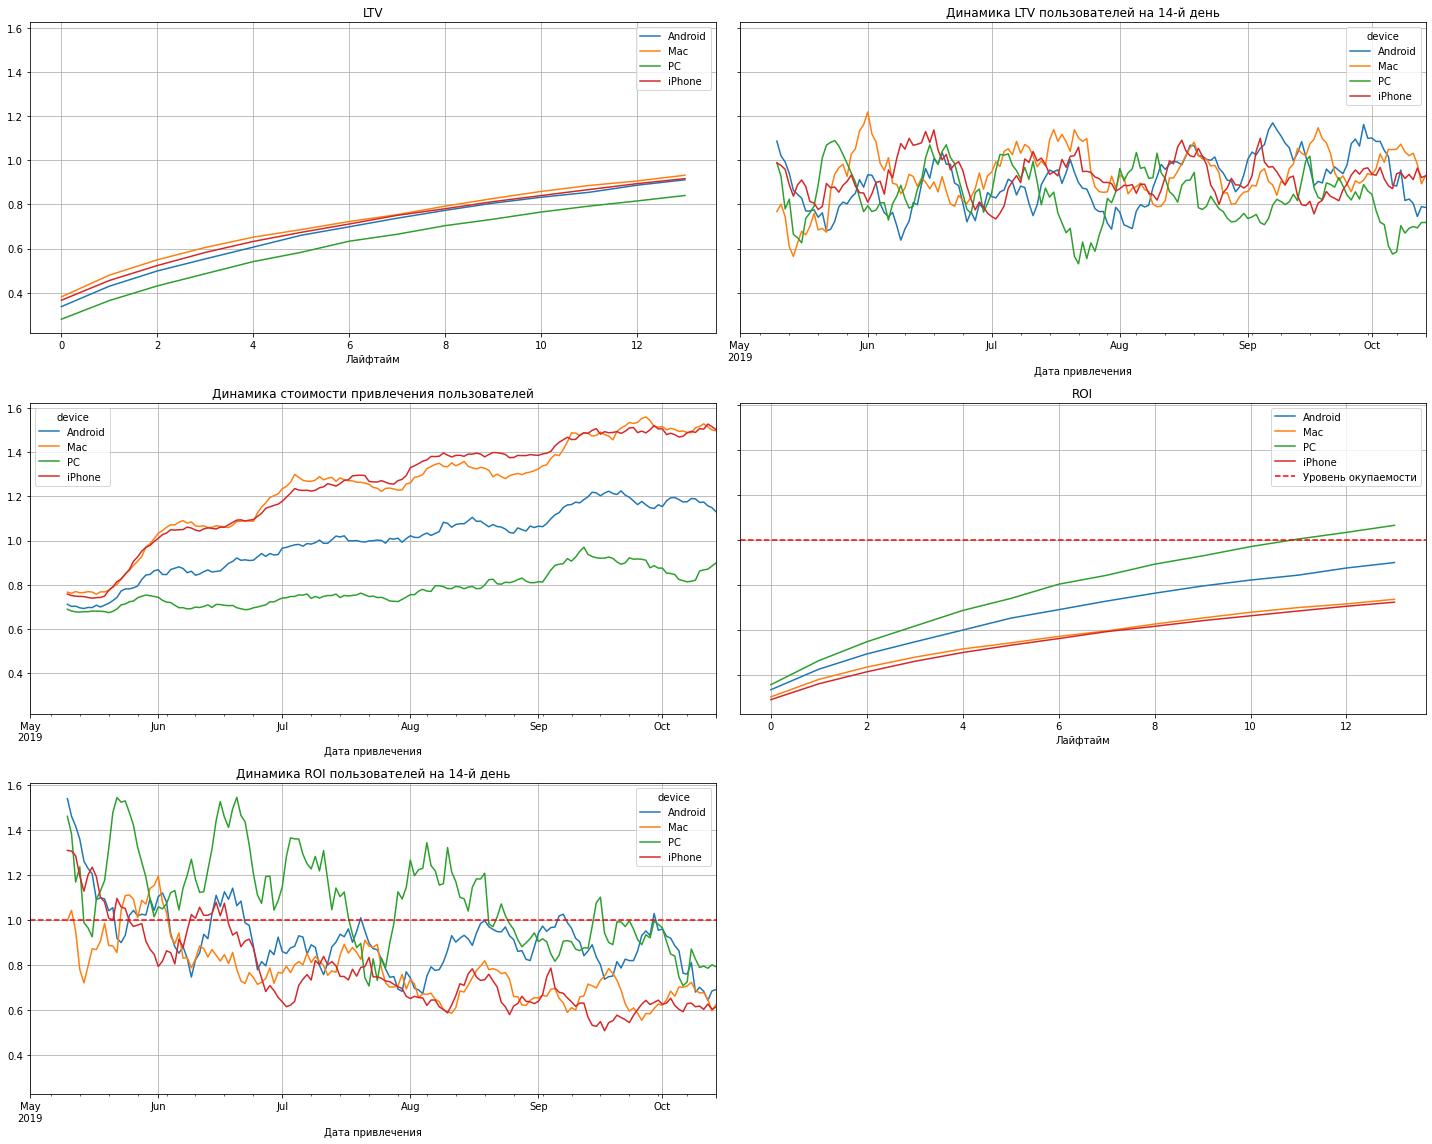

In [33]:
result_raw, result_grouped, result_in_time, roi_grouped,\
roi_in_time = get_ltv(profiles = prof,
    purchases = orders,
    observation_date = observation_date,
    horizon_days = horizon_days,
    dimensions=['device']
    )

plot_ltv_roi(ltv = result_grouped, ltv_history = result_in_time, \
             roi = roi_grouped, roi_history = roi_in_time,\
             horizon = horizon_days, window=10)

- дороже всего привлекать пользователей Mac и iPhone, дешевле всего - PC
- Пользователи PC имеют наименьший LTV, остальные примерно одинаковы
- ROI пользователей PC выше всех остальных (только они и окупаются) . Mac и iPhone окупаются хуже всех, не достигают 1

### Проанализируем окупаемость рекламы с разбивкой по странам

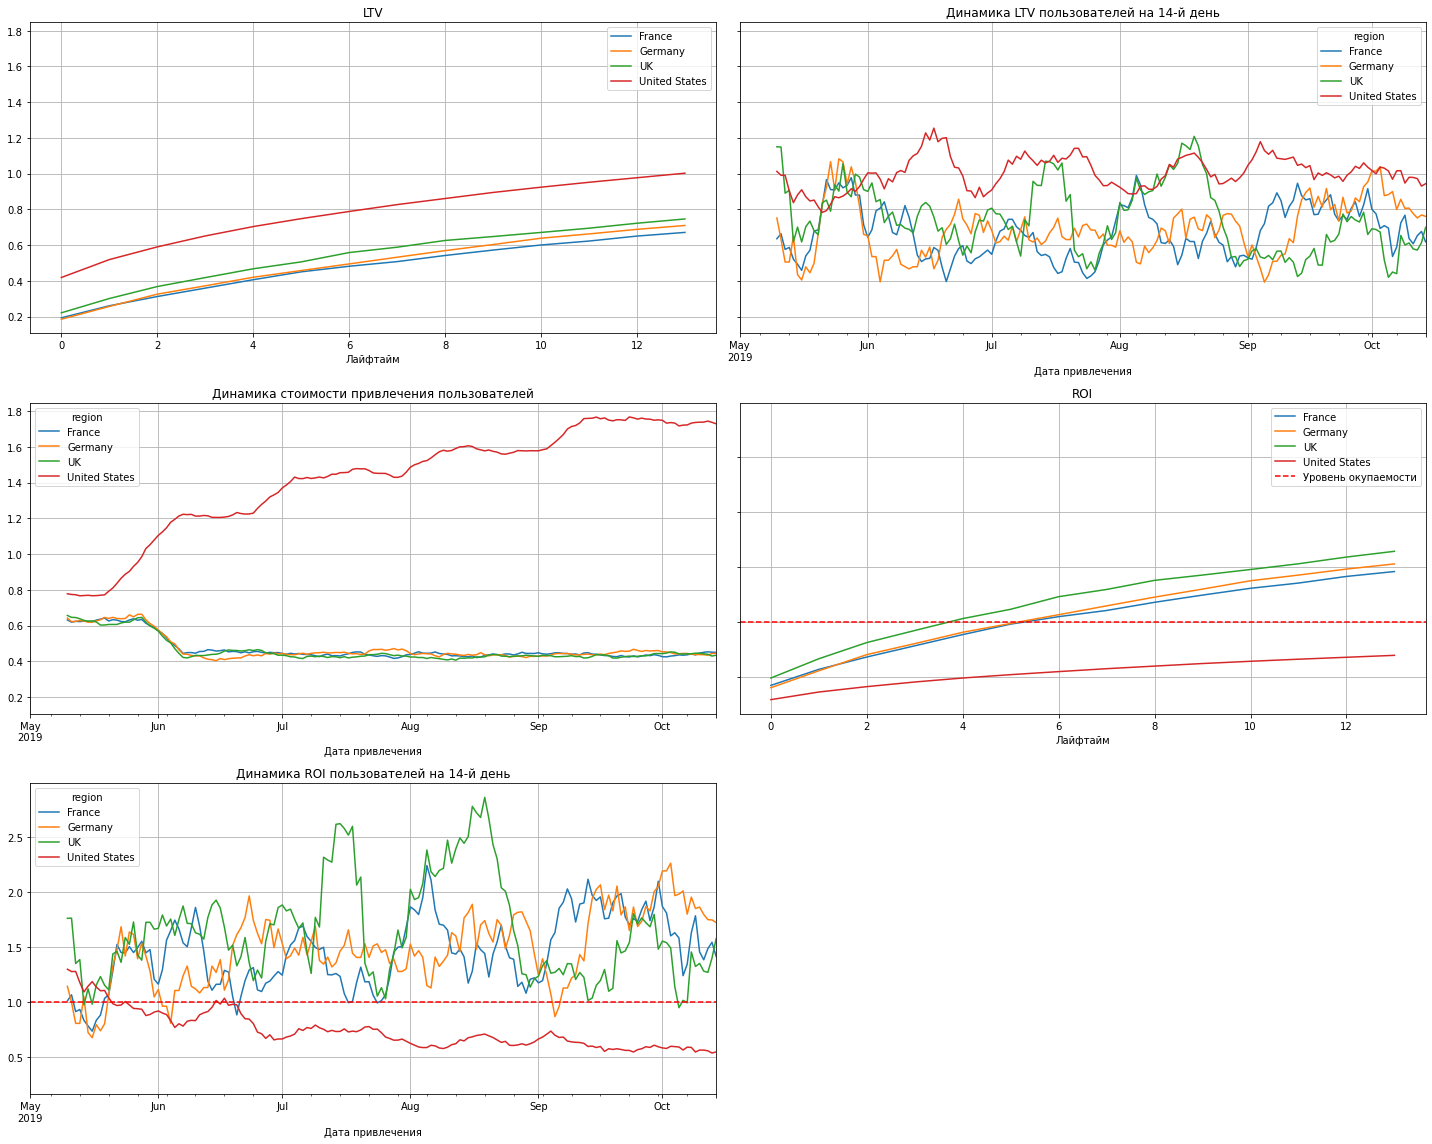

In [34]:
result_raw, result_grouped, result_in_time, roi_grouped,\
roi_in_time = get_ltv(profiles = prof,
    purchases = orders,
    observation_date = observation_date,
    horizon_days = horizon_days,
    dimensions=['region']
    )

plot_ltv_roi(ltv = result_grouped, ltv_history = result_in_time, \
             roi = roi_grouped, roi_history = roi_in_time,\
             horizon = horizon_days, window=10)

- LTV US выше всех, остальные примерно на одном уровне
- в конце мая-начале июня стало резко дороже привлекать пользователей US (помним, что наша основная платящая 
  аудитория как раз - US )
- видим что на 2-3 дни все кроме US окупаются, US так и не переходит границу

### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам

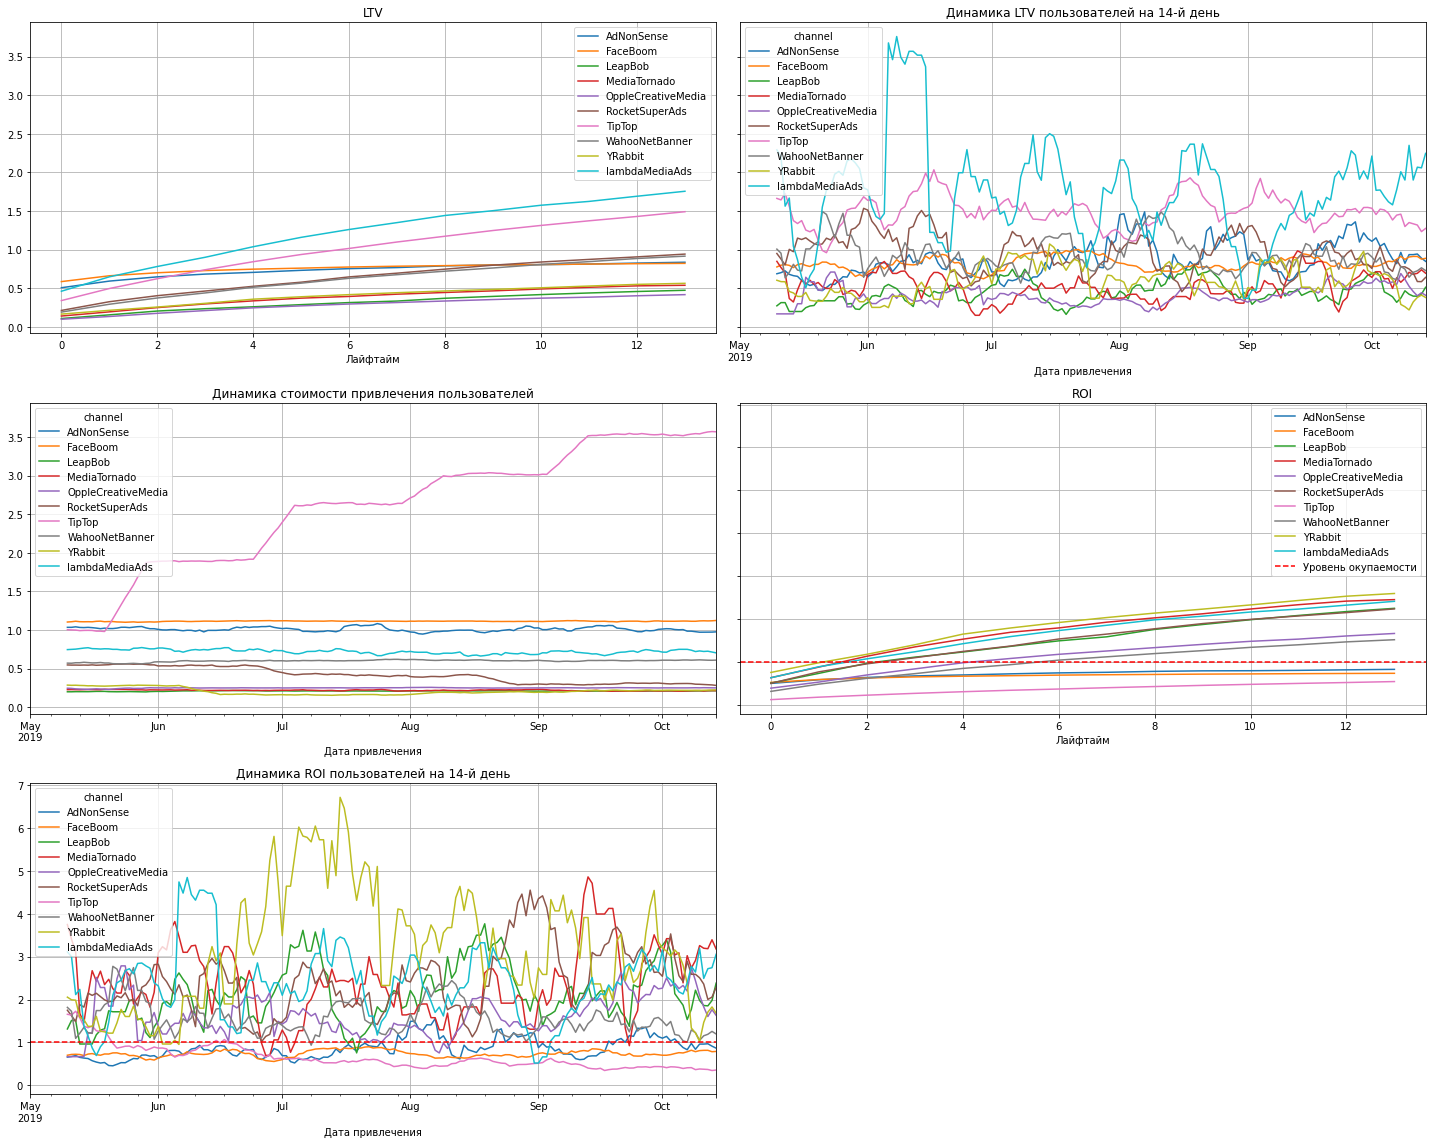

In [35]:
result_raw, result_grouped, result_in_time, roi_grouped,\
roi_in_time = get_ltv(profiles = prof,
    purchases = orders,
    observation_date = observation_date,
    horizon_days = horizon_days,
    dimensions=['channel']
    )

plot_ltv_roi(ltv = result_grouped, ltv_history = result_in_time, \
             roi = roi_grouped, roi_history = roi_in_time,\
             horizon = horizon_days, window=10)

- в июне резко дороже стало привлекать пользователей по каналу TipTop
- Наилучший LTV у каналов lambdaMediaAds и TipTop
- Из за того что CAC TipTop вырос, его ROI упал ниже порогового значения
- у YRabbit низкий LTV , но CAC минимальный, поэтому реклама окупается к 14 дню 



- **TipTop, FaceBoom, AdNonSense не окупаются**

**ранее выяснили:**

- Больше всего платящих пользователей приносят : FaceBoom, TipTop
- Больше всего вложили в рекламу на платформах : FaceBoom, TipTop
- большая чать платящих - от US 

Теперь интересно посмотреть как связаны через платящих пользователей канал TipTop  и регион US 

*Тут я попыталась визуализировать долю платящих покупателей по странам, и какие разделение по каналу внутри каждой страны*

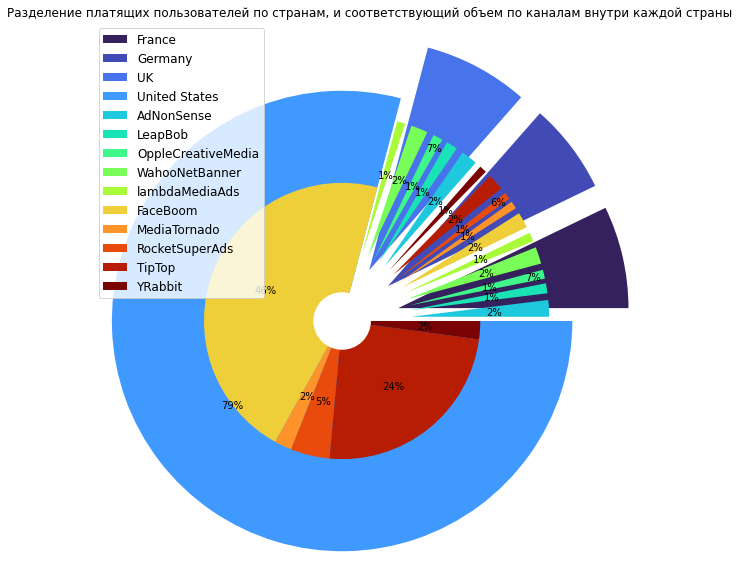

In [36]:
import numpy as np

reg_chanell = prof.query('payer == True').groupby(['region', 'channel']).agg({'user_id' : 'nunique'}).rename(columns = \
                                 {'user_id' : 'n_id'}).reset_index()
reg_chanell = reg_chanell.merge(reg_chanell.groupby(['region']).agg({'n_id' : 'sum'}).reset_index(),\
                                on = 'region' , how = 'left')
reg_chanell['ch_per_reg'] = reg_chanell['n_id_x'] / reg_chanell['n_id_y']

x1= reg_chanell['n_id_y'].unique()
x2= reg_chanell['n_id_x']


cmap = plt.get_cmap('turbo')
outer_colors = cmap(np.linspace(5, 50, 4, dtype = int) )
#inner_colors = cmap(np.linspace(100, 250, 11, dtype = int))
inner_colors = cmap([*np.linspace(70, 130, 5, dtype = int)]+  [*np.linspace(160, 260, 5, dtype = int)])

# Setting the size of the figure
plt.figure(figsize=(8,8))

# Plotting the outer pie
plt.pie(x1,colors=outer_colors,  radius= 2.0, autopct='%1.0f%%', explode = tuple([0.5]*3 + [0])
       )
# PLotting the inner pie
plt.pie(x2,colors=inner_colors, radius= 1.20,
       explode = tuple([0.6]*15 + [0,0,0,0,0]), autopct='%1.0f%%'
       )

# Creating the donut shape for the pie
centre_circle = plt.Circle((0,0), 0.25, fc='white')
fig= plt.gcf()
fig.gca().add_artist(centre_circle) # adding the centre circle

# Plotting the pie 
plt.axis('equal')  # equal aspect ratio
plt.legend(loc=2, fontsize =12,
           #labels =  [*reg_chanell['region'].unique()] + [*reg_chanell['channel'].values ]
          
          
           labels =  [*reg_chanell['region'].unique()] + [*reg_chanell['channel'].unique()])
plt.tight_layout()
plt.title('Разделение платящих пользователей по странам, и соответствующий объем по каналам внутри каждой страны')
plt.show()

- видим что больше всего платящих приходит со штатов, остальные примерно в одинаковом количестве с других стран
- самый объёмный канал привлечения в штатах - FaceBoom, TipTop (в других странах они примерно наравне с остальными каналами)

### Посмотрим на Conversion Rate  и Retention Rate в общем

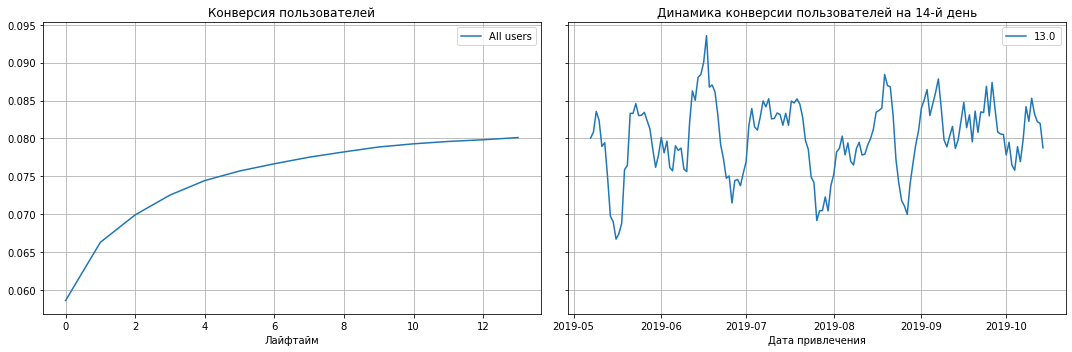

In [37]:
result_raw, result_grouped, result_in_time  = get_conversion(
    prof = prof,
    purchases = orders, 
    observation_date = observation_date,
    horizon_days = horizon_days,
    dimensions=[],   
)

plot_conversion(conversion = result_grouped,\
       conversion_history = result_in_time, horizon = horizon_days, window=7)

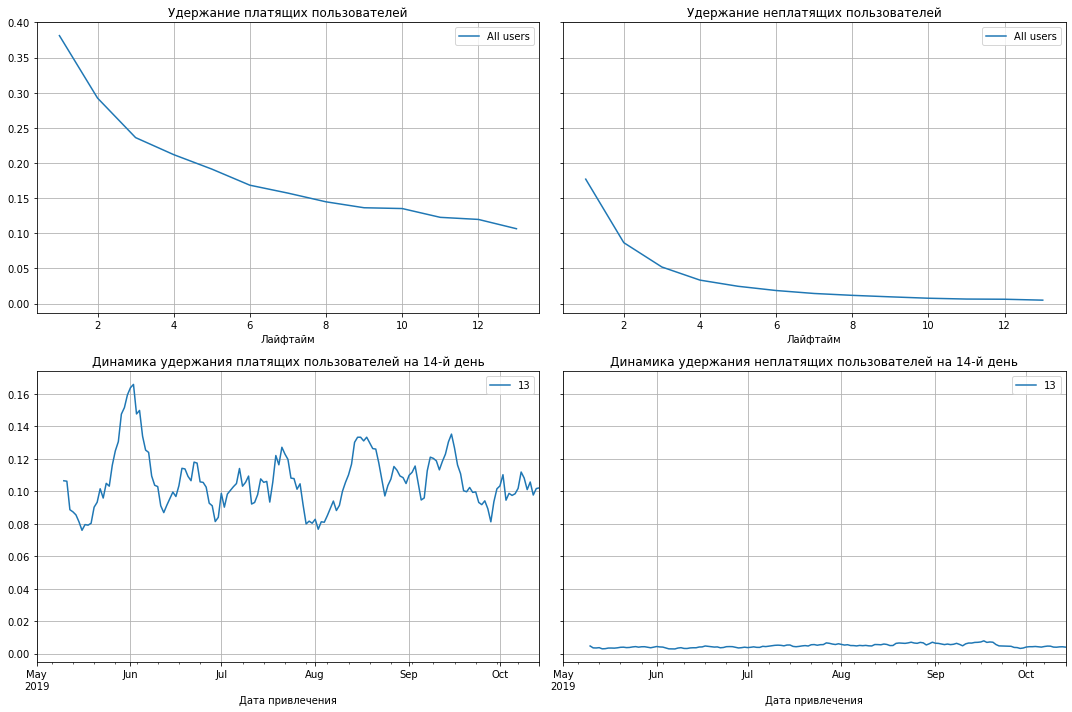

In [38]:
result_raw, result_grouped, result_in_time  = get_retention(
    prof = prof,
    sessions = sessions,
    observation_date = observation_date, 
    horison = horizon_days,
    dimensions = [],
)

plot_retention(retention = result_grouped,\
    retention_history = result_in_time, horizon = horizon_days, window = 10 )

- конверсия выходит на плато около 8%


- удержание платящих выше чем неплатящих, всё как обычно
- удержание неплатящих пользователей нулевое к концу лайфтайма
- удержание платящих снижается от 40 до 10 процентов за 14 дней

### Посмотрим на Conversion Rate  и Retention Rate по устройствам

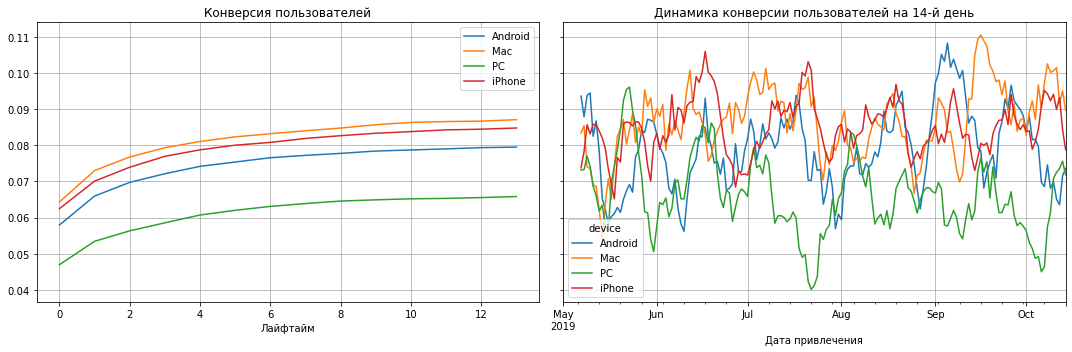

In [39]:
result_raw, result_grouped, result_in_time  = get_conversion(
    prof = prof,
    purchases = orders, 
    observation_date = observation_date,
    horizon_days = horizon_days,
    dimensions=['device'],   
)

plot_conversion(conversion = result_grouped,\
       conversion_history = result_in_time, horizon = horizon_days, window=7)

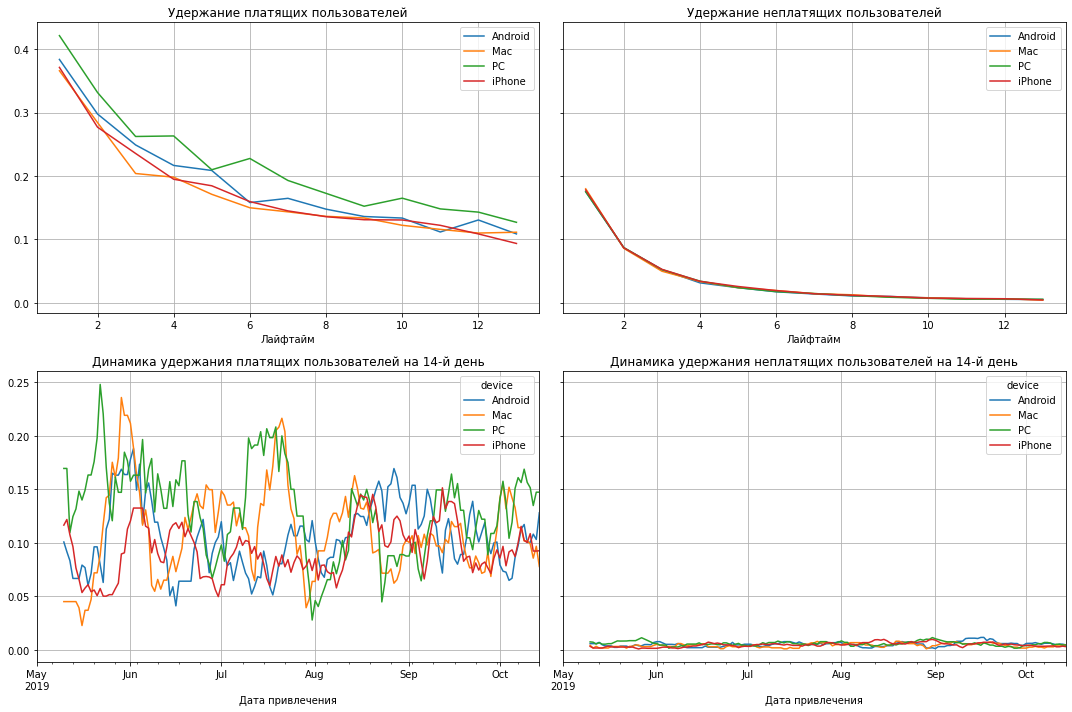

In [40]:
result_raw, result_grouped, result_in_time  = get_retention(
    prof = prof,
    sessions = sessions,
    observation_date = observation_date, 
    horison = horizon_days,
    dimensions = ['device'],
)

plot_retention(retention = result_grouped,\
    retention_history = result_in_time, horizon = horizon_days, window = 10 )

- наименьшая конверсия - у пользователей PC , наилучшая у пользователей Mac и iPhone 
- динамика везде примерно одинаковая
- из платящих пользователей луше держаться пользователи PC 

### Посмотрим на Conversion Rate  и Retention Rate по странам

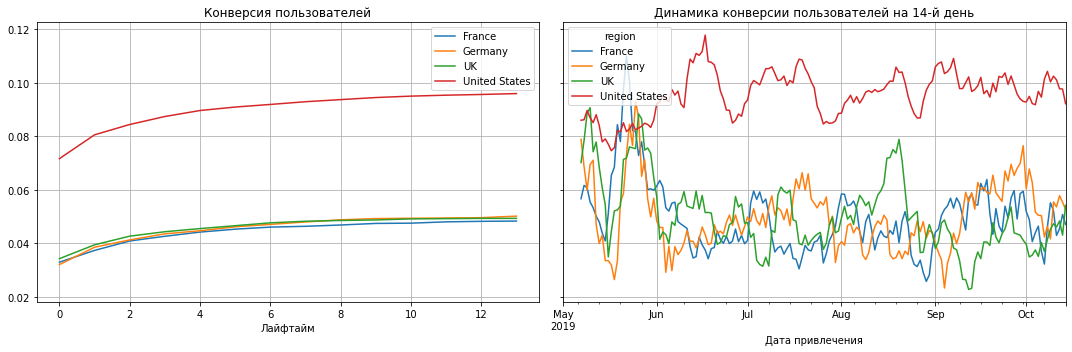

In [41]:
result_raw, result_grouped, result_in_time  = get_conversion(
    prof = prof,
    purchases = orders, 
    observation_date = observation_date,
    horizon_days = horizon_days,
    dimensions=['region'],   
)

plot_conversion(conversion = result_grouped,\
       conversion_history = result_in_time, horizon = horizon_days, window=7)

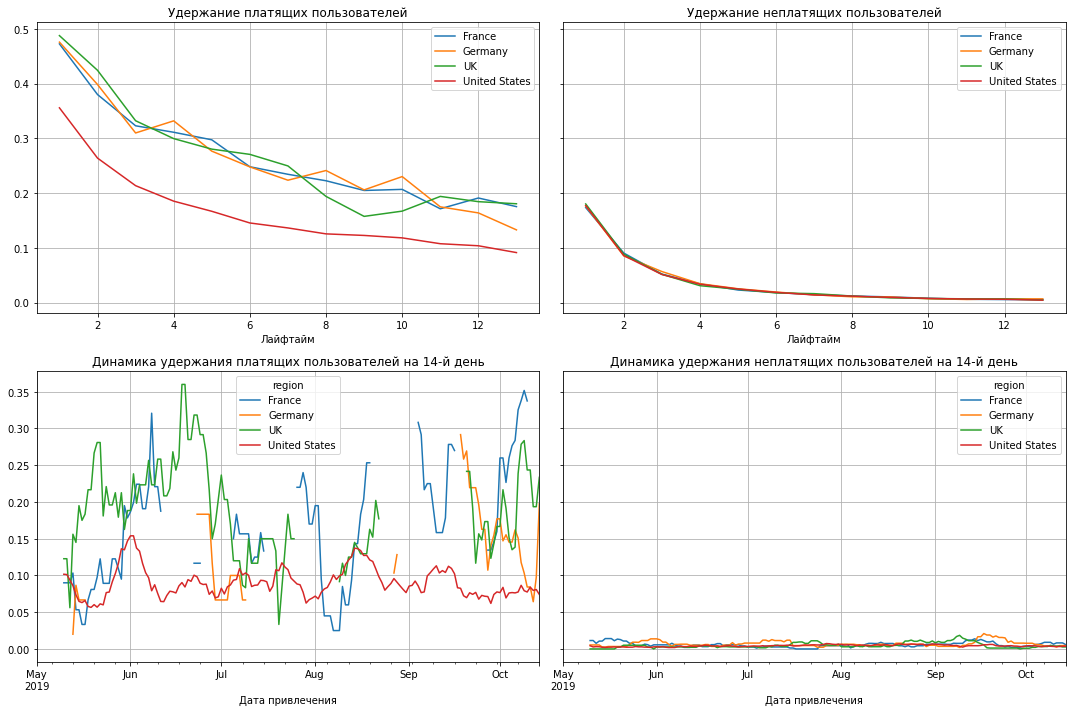

In [42]:
result_raw, result_grouped, result_in_time  = get_retention(
    prof = prof,
    sessions = sessions,
    observation_date = observation_date, 
    horison = horizon_days,
    dimensions = ['region'],
)

plot_retention(retention = result_grouped,\
    retention_history = result_in_time, horizon = horizon_days, window = 10 )

Графики имеют разрывы тк в какой то момент у нас просто не было пользователей  (у нас по Европе очень мало платящих)

- сильный положительный отрыв по конверсии наблюдаем у US , остальные имеют очень низкую конверсию (около 3%-4%)
- среди платящих сложнее всего удержать US

### Посмотрим на Conversion Rate  и Retention Rate по рекламным каналам

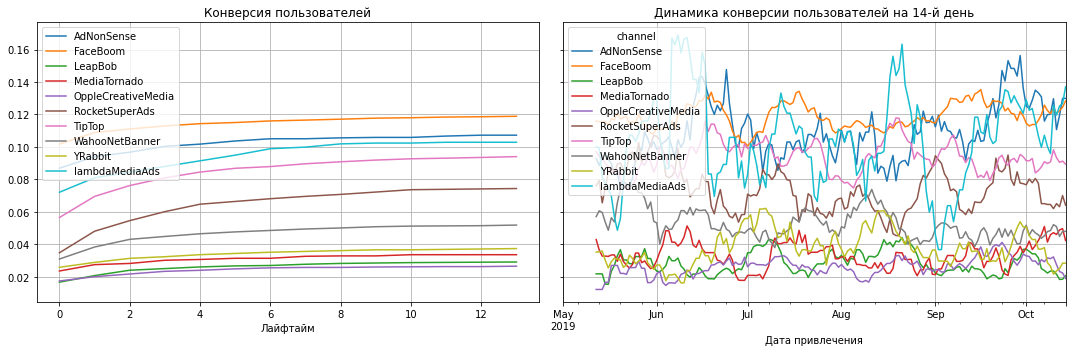

In [43]:
result_raw, result_grouped, result_in_time  = get_conversion(
    prof = prof,
    purchases = orders, 
    observation_date = observation_date,
    horizon_days = horizon_days,
    dimensions=['channel'],   
)

plot_conversion(conversion = result_grouped,\
       conversion_history = result_in_time, horizon = horizon_days, window=12)

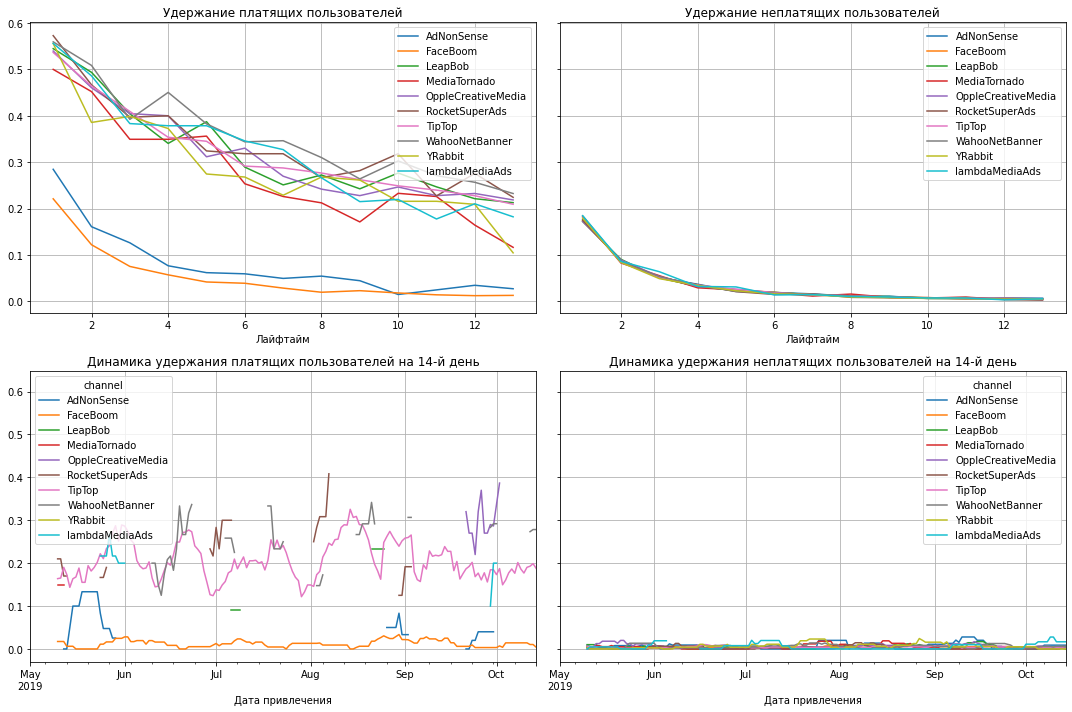

In [44]:
result_raw, result_grouped, result_in_time  = get_retention(
    prof = prof,
    sessions = sessions,
    observation_date = observation_date, 
    horison = horizon_days,
    dimensions = ['channel'],
)

plot_retention(retention = result_grouped,\
    retention_history = result_in_time, horizon = horizon_days, window = 10 )

- топ по конверсии каналы : FaceBoom, lambda..., TipTop
- из платящих пользователей выделяется очень низкие retention с канала FaceBoom  и AdNonSense (видимо это и есть причина их не окупаемости)

Визуализация разделения платящих пользователей по странам, и соответствующий объем по device внутри каждой страны 

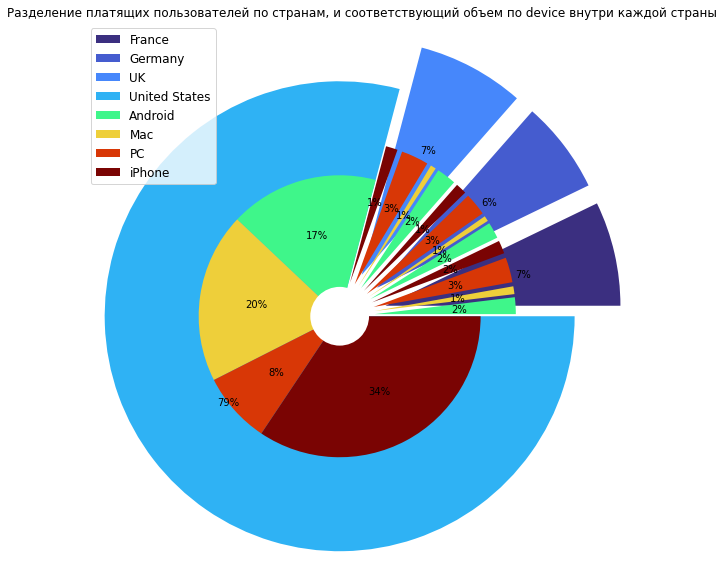

In [45]:
import numpy as np

reg_device = prof.query('payer == True').groupby(['region', 'device']).agg({'user_id' : 'nunique'}).rename(columns = \
                                 {'user_id' : 'n_id'}).reset_index()
reg_device = reg_device.merge(reg_device.groupby(['region']).agg({'n_id' : 'sum'}).reset_index(),\
                                on = 'region' , how = 'left')
reg_device['device_per_reg'] = reg_device['n_id_x'] / reg_device['n_id_y']

x1= reg_device['n_id_y'].unique()
x2= reg_device['n_id_x']
cmap = plt.get_cmap('turbo')
outer_colors = cmap(np.linspace(10, 60, 4, dtype = int) )
inner_colors = cmap(np.linspace(100, 280, 4, dtype = int))

# Setting the size of the figure
plt.figure(figsize=(8,8))
# Plotting the outer pie
plt.pie(x1,  colors=outer_colors, radius= 2.0, autopct='%1.0f%%',
        explode = tuple([0.4]*3 + [0])
       )
# PLotting the inner pie
plt.pie(x2,colors=inner_colors, radius= 1.20,autopct='%1.0f%%',
        explode = tuple([0.3]*12 + [0,0,0,0])
       )
# Creating the donut shape for the pie
centre_circle = plt.Circle((0,0), 0.25, fc='white')
fig= plt.gcf()
fig.gca().add_artist(centre_circle) # adding the centre circle
# Plotting the pie 
plt.axis('equal')  # equal aspect ratio
plt.legend(loc=2, fontsize =12, labels =  [*reg_device['region'].unique()] + [*reg_device['device'].unique() ] )
plt.tight_layout()
plt.title('Разделение платящих пользователей по странам, и соответствующий объем по device внутри каждой страны')
plt.show()

По итогу :
- основная масса платящих пользователей приходит с US через каналы FaceBoom, TipTop
- При этом в US основные устройства это iPhone, Mac и Android (каждый) составляют почти 1/3 от всех устройств  ( такая же картина среди всех платящих, а не только из US)
- Больше всего вложили в рекламу на платформах : TipTop, FaceBoom
- Средняя стоимость рекламы стала дороже, при этом привлекать покупателей из TipTop, FaceBoom и AdNonSense дороже всего

**По CAC и ROI** 

*общая окупаемость рекламы:*
- Видим что реклама перестала окупаться в середине июня
- CAC постепенно растёт, LTV примерно на одном уровне
- ROI не переходит порог к 14 дню


*окупаемость рекламы с разбивкой по устройствам:*

- дороже всего привлекать пользователей Mac и iPhone, дешевле всего - PC
- Пользователи PC имеют наименьший LTV, остальные примерно одинаковы
- ROI пользователей PC выше всех остальных. Mac и iPhone окупаются хуже всех, не достигают 1


*окупаемость рекламы с разбивкой по странам:*

- LTV US выше всех, остальные примерно на одном уровне
- в конце мая-начале июня стало резко дороже привлекать пользователей US (помним, что наша основная платящая аудитория как раз - US )
- видим что на 2-3 дни все кроме US окупаются, US так и не переходит границу

*окупаемость рекламы с разбивкой по рекламным каналам:*


- в июне резко дороже стало привлекать пользователей по каналу TipTop
- Наилучший LTV у каналов lambdaMediaAds и TipTop
- Из за того что CAC TipTop вырос, его ROI упал ниже порогового значения
- у YRabbit низкий LTV , но CAC минимальный, поэтому реклама окупается к 14 дню
- TipTop, FaceBoom, AdNonSense не окупаются



**По Conversion Rate , Retention Rate:**

*в общем:*


- конверсия выходит на плато около 8%

- удержание платящих выше чем неплатящих, всё как обычно (при этом удержание неплатящих пользователей нулевое к концу лайфтайма)
- удержание платящих снижается от 40 до 10 процентов за 14 дней


*по устройствам:*


- наименьшая конверсия - у пользователей PC , наилучшая у пользователей Mac и iPhone
- динамика везде примерно одинаковая
- из платящих пользователей луше держаться пользователи PC


*по странам:*

- сильный положительный отрыв по конверсии наблюдаем у US , остальные имеют очень низкую конверсию (около 3%-4%)
- среди платящих сложнее всего удержать US


*по каналам:*

- FaceBoom и AdNonSense имеют наименьший Retention, но Conversion выше всех
- топ по конверсии каналы : FaceBoom, organic, lambda..., TipTop






# Выводы


*Чем могут быть вызваны проблемы окупаемости?*

Можем проследить такую цепочку:

- Наши основные платящие это US
- В US основные устройства это Mac и  iPhone, основные каналы привлечения -  FaceBoom, TipTop
- в июне стало резко дороже привлекать по каналу TipTop  (при этом сильных изменений в LTV нет)
- соответственно графики окупаемости рекламы по региону и по устройствам выросли


- особенности пользователей US : они быстро переходят в платящих, но их трудно удержать


------

*Что можно сделать?*

- рассмотреть каналы lambdaMediaAds, RocketSuperAds	 (имеет Retention примерно как и через TipTop , конверсия выше большинства других.
Но проблема в том что этот канал не популярен в US , поэтому...)
- перераспределить вложения в рекламу между TipTop/FaceBoom и lambdaMediaAds, RocketSuperAds
- или  уменьшить долю пользователей с US (больше вкладываться в каналы, популярные в других регионах)